# Task 1: Exploratory Data Analysis(EDA) -

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from scipy.stats import ttest_ind

In [26]:
df = pd.read_csv("/content/Car_details_v3[1].csv")

**Some questions for EDA:**
1. How does car price vary with year, mileage, and power?
2. Do automatic cars cost more than manual cars?
3. Does fuel type affect car price significantly?
4. What are the common issues/anomalies in the dataset?

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


In [28]:
print(df.head())

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [29]:
print(df.describe())

              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


In [30]:
print(df.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [31]:
print(df.shape)

(8128, 13)


**Cleaning numeric columns**

In [32]:
def extract_numeric(x):
    if pd.isnull(x):
        return np.nan
    match = re.search(r"[\d.]+", str(x))
    return float(match.group()) if match else np.nan

In [33]:
df['mileage_num'] = df['mileage'].apply(extract_numeric)
df['engine_num'] = df['engine'].apply(extract_numeric)
df['max_power_num'] = df['max_power'].apply(extract_numeric)

In [34]:
df['car_age'] = 2025 - df['year']

**Identifying Trends, Patterns & Anomalies**

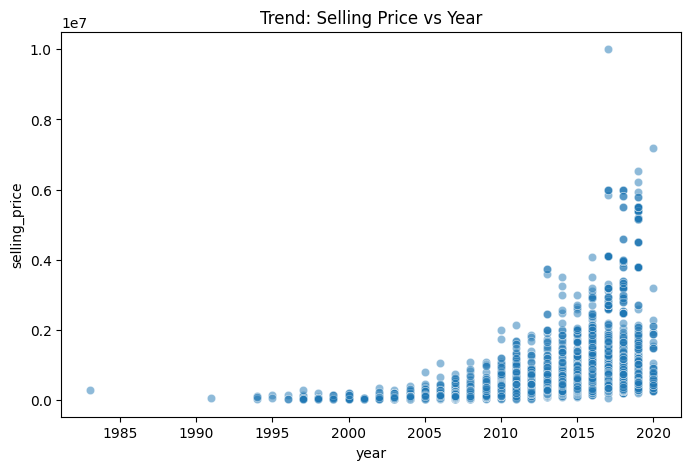

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.5)
plt.title("Trend: Selling Price vs Year")
plt.show()

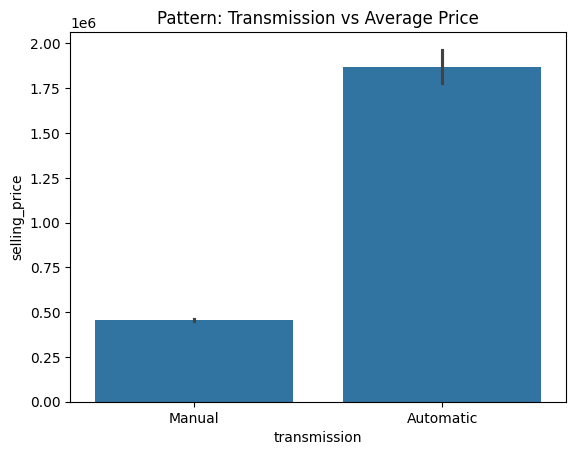

In [36]:
sns.barplot(x='transmission', y='selling_price', data=df)
plt.title("Pattern: Transmission vs Average Price")
plt.show()

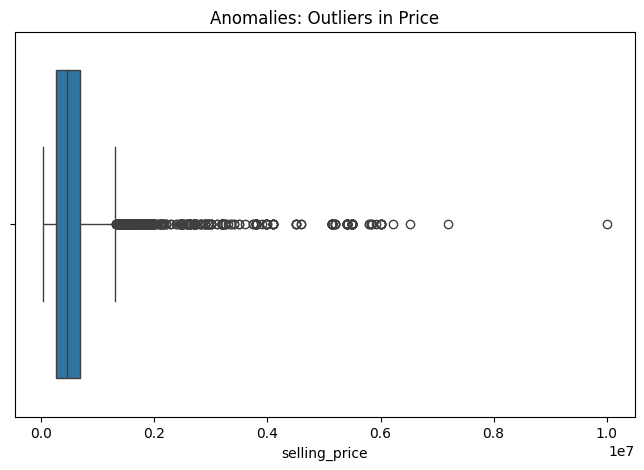

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['selling_price'])
plt.title("Anomalies: Outliers in Price")
plt.show()

**Testing Hypotheses & Validating Assumptions**

Automatic cars are more expensive than manual cars

In [38]:
auto_prices = df[df['transmission']=="Automatic"]['selling_price']
manual_prices = df[df['transmission']=="Manual"]['selling_price']

In [39]:
tstat, pval = ttest_ind(auto_prices, manual_prices, nan_policy='omit')

In [40]:
print("H0: Automatic and Manual car prices are the same")
print("H1: Automatic cars are more expensive")
print(f"T-statistic = {tstat:.2f}, p-value = {pval:.4f}")


H0: Automatic and Manual car prices are the same
H1: Automatic cars are more expensive
T-statistic = 65.67, p-value = 0.0000


In [41]:
if pval < 0.05:
    print("Reject H0 → Automatic cars are significantly more expensive")
else:
    print("Fail to Reject H0 → No significant difference")

Reject H0 → Automatic cars are significantly more expensive


Newer cars have higher prices (correlation test)

In [42]:
corr = df[['selling_price','year','car_age']].corr()
print("\n===== HYPOTHESIS TEST 2 =====")
print("Correlation between Year and Price:")
print(corr)


===== HYPOTHESIS TEST 2 =====
Correlation between Year and Price:
               selling_price      year   car_age
selling_price       1.000000  0.414092 -0.414092
year                0.414092  1.000000 -1.000000
car_age            -0.414092 -1.000000  1.000000


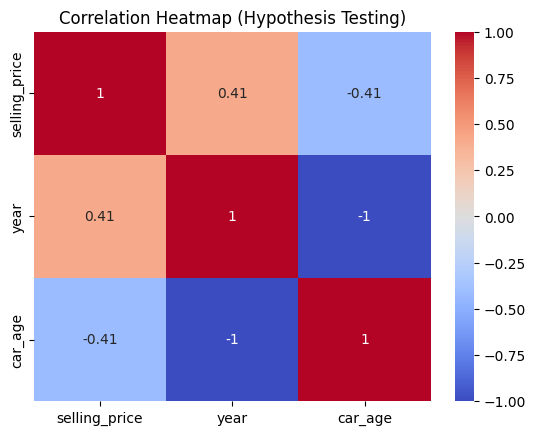

In [43]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Hypothesis Testing)")
plt.show()

**Detecting Data Issues and Problems**

In [44]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
mileage_num      221
engine_num       221
max_power_num    216
car_age            0
dtype: int64


In [45]:
print("\nCars with unrealistic low prices (< ₹20,000):")
print(df[df['selling_price'] < 20000].head())


Cars with unrealistic low prices (< ₹20,000):
Empty DataFrame
Columns: [name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque, seats, mileage_num, engine_num, max_power_num, car_age]
Index: []


In [46]:
print("\nCars with future manufacturing years (>2025):")
print(df[df['year'] > 2025])


Cars with future manufacturing years (>2025):
Empty DataFrame
Columns: [name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque, seats, mileage_num, engine_num, max_power_num, car_age]
Index: []


In [47]:
print("\nExtreme Outliers (Top 5 most expensive cars):")
print(df.sort_values(by='selling_price', ascending=False).head())


Extreme Outliers (Top 5 most expensive cars):
                                  name  year  selling_price  km_driven  \
170      Volvo XC90 T8 Excellence BSIV  2017       10000000      30000   
2938             BMW X7 xDrive 30d DPE  2020        7200000       5000   
4952            Audi A6 35 TFSI Matrix  2019        6523000      23600   
4950            Audi A6 35 TFSI Matrix  2019        6223000       7800   
4766  BMW 6 Series GT 630d Luxury Line  2018        6000000      27000   

        fuel seller_type transmission           owner     mileage   engine  \
170   Petrol  Individual    Automatic     First Owner   42.0 kmpl  1969 CC   
2938  Diesel  Individual    Automatic     First Owner  13.38 kmpl  2993 CC   
4952  Petrol      Dealer    Automatic  Test Drive Car  15.26 kmpl  1798 CC   
4950  Petrol      Dealer    Automatic  Test Drive Car  15.26 kmpl  1798 CC   
4766  Diesel      Dealer    Automatic     First Owner  17.09 kmpl  2993 CC   

       max_power               torque  

**FINAL INSIGHTS**

In [48]:
print("Trends: Newer cars, bigger engines, automatic transmission = higher prices.")
print("Patterns: More km driven → lower price. Diesel/Petrol dominate market.")
print("Anomalies: Some cars priced too low (<20k) or too high (>1 Cr). Missing data in engine/mileage/power.")
print("Next Steps: Clean missing values, remove outliers, encode categories, build price prediction model.")

Trends: Newer cars, bigger engines, automatic transmission = higher prices.
Patterns: More km driven → lower price. Diesel/Petrol dominate market.
Anomalies: Some cars priced too low (<20k) or too high (>1 Cr). Missing data in engine/mileage/power.
Next Steps: Clean missing values, remove outliers, encode categories, build price prediction model.
